## Business Problem


<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

# Dataset Information

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.


## <font color='red'> Model-1 </font>


<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



# <font color='red'> Model-1 </font>

In [69]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from keras.models import Model
from tqdm import tqdm
import numpy as np
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2
from tensorflow.keras.optimizers import Adam
from keras_preprocessing.image import load_img
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras.layers import Embedding,Flatten,Dropout,concatenate,Dense,Input,LSTM,Concatenate, BatchNormalization
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#read the csv file
import pandas as pd

In [70]:

df = pd.read_csv('../input/project-resources/preprocessed_data.csv')
df.shape

(109248, 9)

In [71]:
features = ['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects',
       'clean_categories', 'clean_subcategories', 'essay', 'price']

features_df = df[features]
label_df = df['project_is_approved']

In [72]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, test_size=0.20, random_state=42, stratify=label_df)


X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)

print("Training Data shape", X_train.shape)
print("Testing Data Shape", X_test.shape)
print("Cross Validation shape",X_cv.shape)

Training Data shape (69918, 8)
Testing Data Shape (21850, 8)
Cross Validation shape (17480, 8)


## 1.1 Text Vectorization

In [73]:

# hyper parameters
# num_words = 5000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'



In [74]:
# Tokenize our training data
tokenizer = Tokenizer( oov_token=oov_token)
tokenizer.fit_on_texts(X_train['essay'])

# # Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
essay_train_sequences = tokenizer.texts_to_sequences(X_train['essay'])
essay_test_sequences = tokenizer.texts_to_sequences(X_test['essay'])
essay_cv_sequences = tokenizer.texts_to_sequences(X_cv['essay'])
# Get max training sequence length
maxlen = min(250,max([len(x) for x in essay_train_sequences]))
print("Maximum Length of essay in training data", maxlen)

# Pad the training sequences
train_padded = pad_sequences(essay_train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
test_padded = pad_sequences(essay_test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
cv_padded = pad_sequences(essay_cv_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
# Output the results of our work
print("\nPadded training shape:", train_padded.shape)
print("\nPadded testing shape", test_padded.shape)
print("\nPadded validation shape", cv_padded.shape)
print("Training sequences data type:", type(essay_train_sequences))
print("Padded Training sequences data type:", type(train_padded))


Maximum Length of essay in training data 250

Padded training shape: (69918, 250)

Padded testing shape (21850, 250)

Padded validation shape (17480, 250)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [75]:

glove_model = dict()

with open('../input/glove42b300dtxt/glove.42B.300d.txt','r',encoding="utf8") as glove_file:
    for line in tqdm(glove_file):
        splitline = line.split()
        word = splitline[0]
        word_vector = np.array([float(val) for val in splitline[1:]],dtype=np.float16)
        glove_model[word] = word_vector
print(len(glove_model))

1917494it [04:02, 7893.05it/s]

1917494


In [76]:
EMBEDDING_DIMENSION = 300
print('Found %s unique tokens.' % len(word_index))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIMENSION), dtype=np.float16)
for word, index in word_index.items():
    # get word embedding we created using glove vectors
    w2v = glove_model.get(word)
    # if word embedding is none this word is not present in our vectors ignore them
    if w2v is not None:
        embedding_matrix[index] = w2v
        
print("embedding_matrix shape",embedding_matrix.shape)

Found 47380 unique tokens.
embedding_matrix shape (47381, 300)


In [77]:
# cleaning up
del glove_model
import gc 
gc.collect()

8028

## 1.2 Categorical feature Vectorization

In [78]:
categorical_features  =['school_state','teacher_prefix','project_grade_category',
                       'clean_categories','clean_subcategories']
categorical_features

['school_state',
 'teacher_prefix',
 'project_grade_category',
 'clean_categories',
 'clean_subcategories']

## 1.2.1 School_state Encoding


In [79]:
school_state_le = LabelEncoder()
school_state_le.fit(X_train['school_state'].values)

X_train_school_state_encoded = school_state_le.transform(X_train['school_state'].values).reshape(-1,1)
X_test_school_state_encoded = school_state_le.transform(X_test['school_state'].values).reshape(-1,1)
X_cv_school_state_encoded = school_state_le.transform(X_cv['school_state'].values).reshape(-1,1)

## 1.2.1 teacher_prefix Encoding

In [80]:
teacher_prefix_le = LabelEncoder()
teacher_prefix_le.fit(X_train['teacher_prefix'].values)

X_train_teacher_prefix_encoded = teacher_prefix_le.transform(X_train['teacher_prefix'].values).reshape(-1,1)
X_test_teacher_prefix_encoded = teacher_prefix_le.transform(X_test['teacher_prefix'].values).reshape(-1,1)
X_cv_teacher_prefix_encoded = teacher_prefix_le.transform(X_cv['teacher_prefix'].values).reshape(-1,1)

## 1.2.2 project_grade_category Encoding

In [81]:
grade_le = LabelEncoder()
grade_le.fit(X_train['project_grade_category'].values)

X_train_grade_encoded = grade_le.transform(X_train['project_grade_category'].values).reshape(-1,1)
X_test_grade_encoded = grade_le.transform(X_test['project_grade_category'].values).reshape(-1,1)
X_cv_grade_encoded = grade_le.transform(X_cv['project_grade_category'].values).reshape(-1,1)

## 1.2.3 clean_categories Encoding

In [82]:
category_tokenizer = Tokenizer()
# fit on train data
category_tokenizer.fit_on_texts(X_train['clean_categories'])
x_train_category_sequences = category_tokenizer.texts_to_sequences(X_train['clean_categories'])
maxlen = max([len(seq) for seq in  x_train_category_sequences])

x_train_category_padded = pad_sequences(x_train_category_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)

x_test_category_sequences = category_tokenizer.texts_to_sequences(X_test['clean_categories'])
x_test_category_padded = pad_sequences(x_test_category_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)

x_cv_category_sequences = category_tokenizer.texts_to_sequences(X_cv['clean_categories'])
x_cv_category_padded = pad_sequences(x_cv_category_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)


# X_train_clean_subcat = clean_subcat_tok.
# ,texts_to_sequences(X_train['clean_subcategories'])
# pad_sequences(essay_train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
# test_padded = 
print("train encoded category shape",x_train_category_padded.shape)

print("test encoded category shape",x_test_category_padded.shape)

print("cv encoded category shape",x_cv_category_padded.shape)

train encoded category shape (69918, 5)
test encoded category shape (21850, 5)
cv encoded category shape (17480, 5)


## 1.2.4 clean_subcategories Encoding

In [83]:
subcategory_tokenizer = Tokenizer()
# fit on train data
subcategory_tokenizer.fit_on_texts(X_train['clean_subcategories'])
x_train_subcategory_sequences = subcategory_tokenizer.texts_to_sequences(X_train['clean_subcategories'])
maxlen = max([len(seq) for seq in  x_train_subcategory_sequences])
x_train_subcategory_padded = pad_sequences(x_train_subcategory_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)

x_test_subcategory_sequences = category_tokenizer.texts_to_sequences(X_test['clean_subcategories'])
x_test_subcategory_padded = pad_sequences(x_test_subcategory_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)

x_cv_subcategory_sequences = category_tokenizer.texts_to_sequences(X_cv['clean_subcategories'])
x_cv_subcategory_padded = pad_sequences(x_cv_subcategory_sequences,padding=pad_type, truncating=trunc_type, maxlen=maxlen)


print("train encoded sub category shape",x_train_subcategory_padded.shape)

print("test encoded sub category shape",x_test_subcategory_padded.shape)

print("cv encoded sub category shape",x_cv_category_padded.shape)

train encoded sub category shape (69918, 5)
test encoded sub category shape (21850, 5)
cv encoded sub category shape (17480, 5)


## 1.3 Numerical feature Vectorization

In [84]:

scaler = StandardScaler()
scaler.fit(np.array(X_train['price']).reshape(-1,1))
xtrain_price = scaler.transform(np.array(X_train['price']).reshape(-1,1))
xtest_price = scaler.transform(np.array(X_test['price']).reshape(-1,1))
xcv_price = scaler.transform(np.array(X_cv['price']).reshape(-1,1))

print("Train price shape",xtrain_price.shape)
print("Train price shape",xtest_price.shape)
print("Train price shape",xcv_price.shape)



scaler = StandardScaler()
scaler.fit(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xtrain_teacher_project = scaler.transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xtest_teacher_project = scaler.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xcv_teacher_project = scaler.transform(np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1,1))

print("Train teacher number of project shape",xtrain_teacher_project.shape)
print("Train teacher number of project shape",xtest_teacher_project.shape)
print("Train teacher number of project shape",xcv_teacher_project.shape)


Train price shape (69918, 1)
Train price shape (21850, 1)
Train price shape (17480, 1)
Train teacher number of project shape (69918, 1)
Train teacher number of project shape (21850, 1)
Train teacher number of project shape (17480, 1)


In [85]:
# Concate features
xtrain_numerical = np.concatenate((xtrain_teacher_project,xtrain_price), axis=1)
xtest_numerical = np.concatenate((xtest_teacher_project,xtest_price), axis=1)
xcv_numerical = np.concatenate((xcv_teacher_project,xcv_price), axis=1)

print("xtrain numerical feature shape",xtrain_numerical.shape)

print("xtest numerical feature shape",xtest_numerical.shape)

print("xcv numerical feature shape",xcv_numerical.shape)

xtrain numerical feature shape (69918, 2)
xtest numerical feature shape (21850, 2)
xcv numerical feature shape (17480, 2)


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

## 2. Model 1

## 2.1 Model Input preparation

### 2.1.1 Essay Input preparation

In [86]:

essay_input = keras.Input(
    shape=(250,), name="essay"
)

essay_embedding_layer = Embedding(len(word_index)+1,
        300,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False,name='essay_embeddings')

essay_features = essay_embedding_layer(essay_input)
print("essay_input",essay_input.shape)
print("essay_features",essay_features.shape)

# add lstm cells
essay_lstm= keras.layers.LSTM(128)(essay_features)
essay_flatten = Flatten(name='essay_flatten')(essay_lstm) 
print("essay features", essay_flatten.shape)


essay_input (None, 250)
essay_features (None, 250, 300)
essay features (None, 128)


### 2.1.2 School State Input

In [87]:
school_state_input = keras.Input(shape=(1,), name="school_state_input")
school_state_embedding = Embedding(
                                    input_dim = len(school_state_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='school_embedding'
                                  )(school_state_input)

state_flatten = Flatten(name='school_flatten')(school_state_embedding)
print("State flatten shape", state_flatten.shape)





State flatten shape (None, 2)


### 2.1.3 teacher prefix Input

In [88]:
teacher_prefix_input = keras.Input(shape=(1,), name="teacher_prefix_input")
teacher_prefix_embedding = Embedding(
                                    input_dim = len(teacher_prefix_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='teacher_embedding'
                                  )(teacher_prefix_input)

teacher_prefix_flatten = Flatten(name='teacher_flatten')(teacher_prefix_embedding)
print("teacher_prefix_flatten flatten shape", teacher_prefix_flatten.shape)

teacher_prefix_flatten flatten shape (None, 2)


### 2.1.4 project grade category Input

In [89]:
grade_input = keras.Input(shape=(1,), name="grade_input")
grade_embedding = Embedding(
                                    input_dim = len(grade_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='grade_embedding'
                                  )(grade_input)

grade_flatten = Flatten(name='grade_flatten')(grade_embedding)
print("grade_flatten flatten shape", grade_flatten.shape)

grade_flatten flatten shape (None, 2)


### 2.1.5 categories Input

In [90]:
category_input =Input(shape=(5,),name='categories_input')
categories_embedding = Embedding(
                                input_dim=len(category_tokenizer.word_index)+1,
                                output_dim=3,trainable=True,
                                name='category_embedding'
                            )(category_input)
category_flatten = Flatten(name='category_flatten')(categories_embedding )
print("category_flatten  shape", category_flatten.shape)

category_flatten  shape (None, 15)


### 2.1.6 sub category Input

In [91]:
subcategory_input =Input(shape=(5,),name='subcategories_input')
subcategories_embedding = Embedding(
                                input_dim=len(subcategory_tokenizer.word_index)+1,
                                output_dim=3,trainable=True,
                                name='subcategory_embedding'
                            )(subcategory_input)
subcategory_flatten = Flatten(name='subcategory_flatten')(subcategories_embedding )
print("subcategory_flatten  shape", subcategory_flatten.shape)

subcategory_flatten  shape (None, 15)


### 2.1.7 Numerical Input

In [92]:
numerical_input = Input(shape=(2,), name="numerical Input")
numerical_dense = Dense(
                        units=256,
                        activation='relu',
                        kernel_initializer=he_normal(seed=2),
                        kernel_regularizer=l2(0.001),
                        name='numerical_features'
                    )(numerical_input)

print("Numerical Input shape", numerical_dense.shape)


Numerical Input shape (None, 256)


# 3. Concatenated Features

In [93]:
combined_features = Concatenate()([
                                    essay_flatten, state_flatten, teacher_prefix_flatten,
                                    grade_flatten, category_flatten,subcategory_flatten,
                                    numerical_dense
                                   ])

print("Combined concatenated features shape", combined_features.shape)

Combined concatenated features shape (None, 420)


## 4. Dense Layers

In [94]:
dense1 = Dense(
                units=256,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(combined_features)
drop1 = Dropout(0.5)(dense1)
batch_norm_1 = BatchNormalization()(drop1)


dense2 = Dense(
                units=64,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(batch_norm_1)
drop2 = Dropout(0.5)(dense2)
batch_norm_2 = BatchNormalization()(drop2)

dense3 = Dense(
                units=32,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(batch_norm_2)

output_layer = Dense(
                    units=1,
                    activation='sigmoid',
                    kernel_regularizer=l2(0.001)
                )(dense3)



In [95]:

tf.keras.backend.clear_session()
model1 = Model(inputs=[essay_input, school_state_input, teacher_prefix_input,
grade_input, category_input, subcategory_input,
numerical_input],outputs=[output_layer])
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay (InputLayer)              [(None, 250)]        0                                            
__________________________________________________________________________________________________
essay_embeddings (Embedding)    (None, 250, 300)     14214300    essay[0][0]                      
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix_input (InputLaye [(None, 1)]          0                                            
______________________________________________________________________________________________

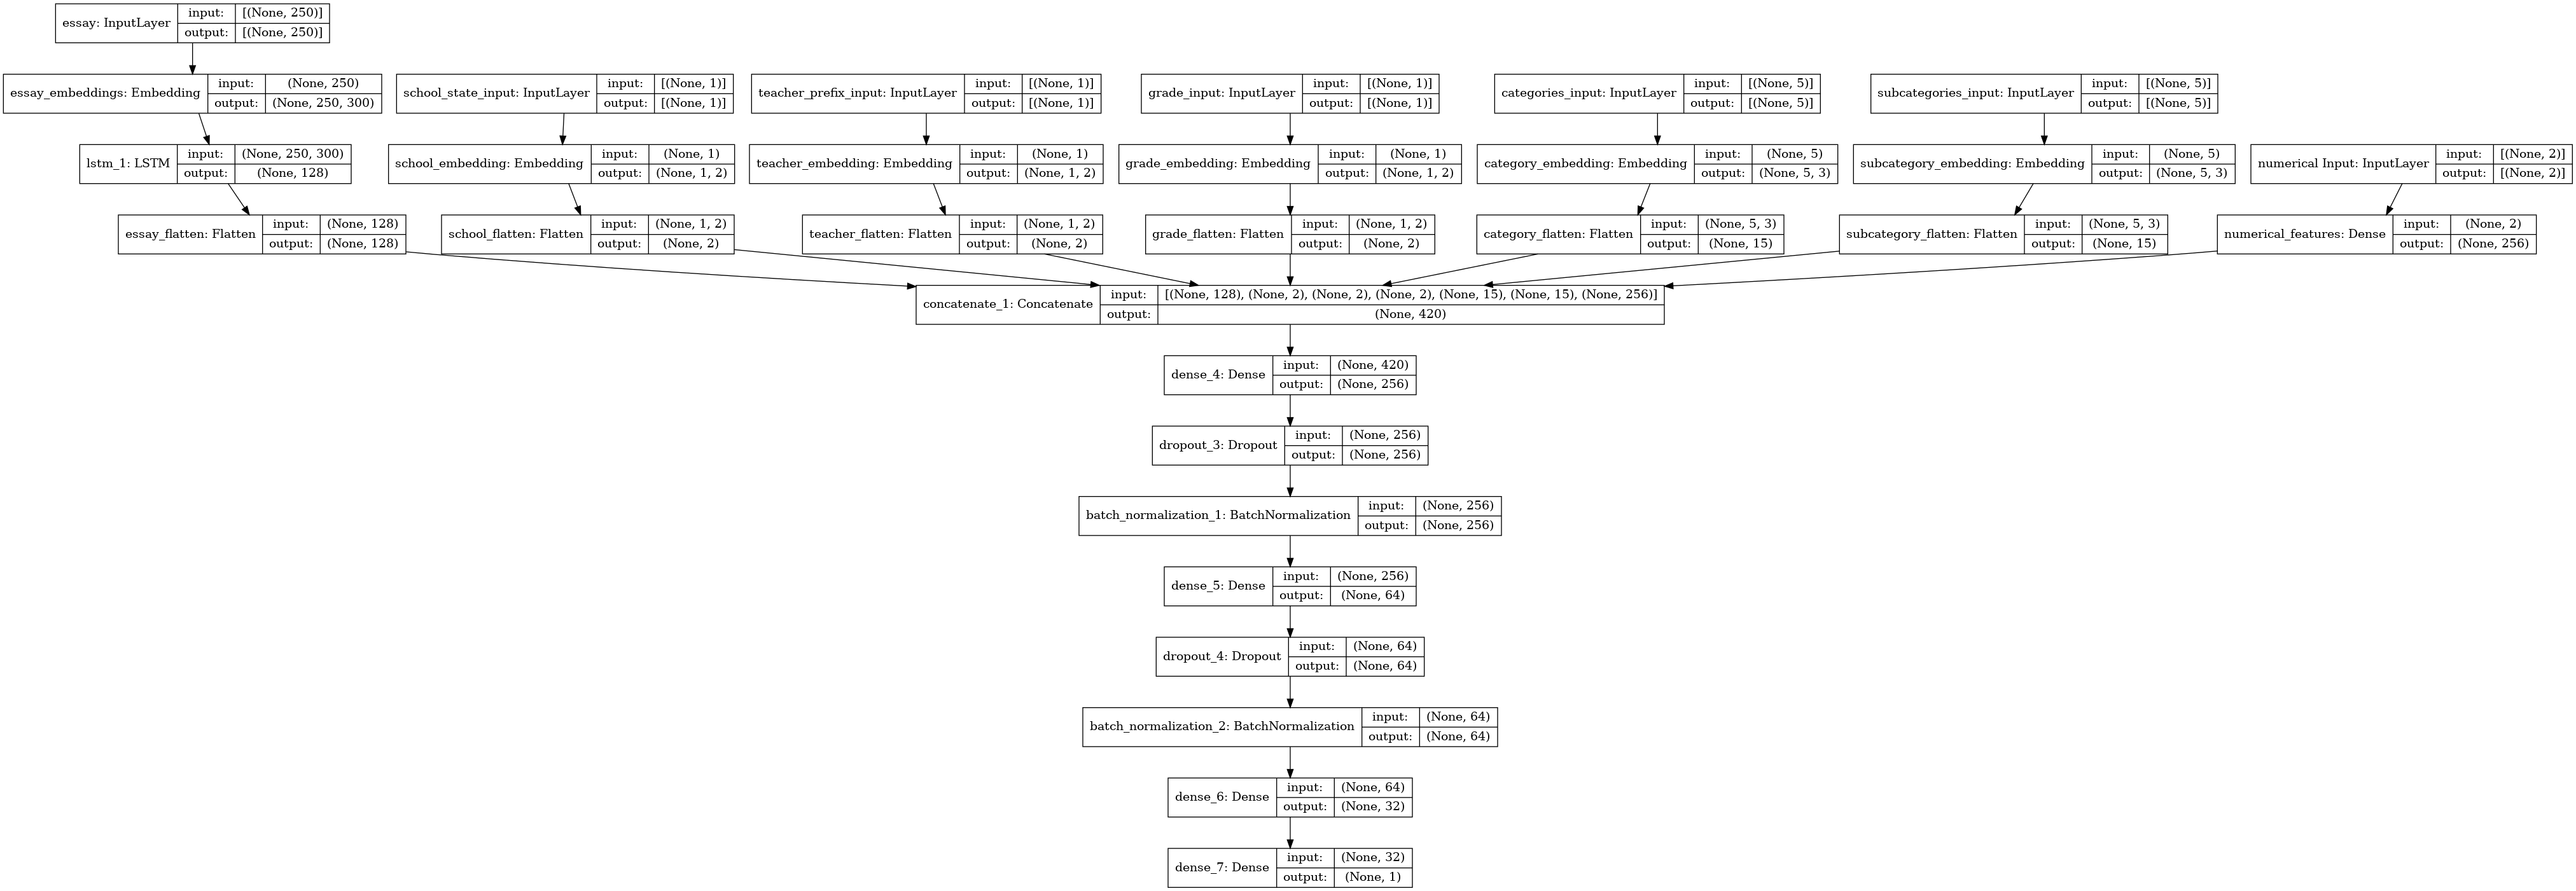

In [96]:
keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)


# 5. Model Training

In [97]:


X_train_data = [
                train_padded,X_train_school_state_encoded, X_train_teacher_prefix_encoded,
                X_train_grade_encoded, x_train_category_padded, x_train_subcategory_padded,
                xtrain_numerical
                ]

X_test_data = [
                test_padded,X_test_school_state_encoded, X_test_teacher_prefix_encoded,
                X_test_grade_encoded, x_test_category_padded, x_test_subcategory_padded,
                xtest_numerical
                ]
    
X_cv_data = [cv_padded,X_cv_school_state_encoded, X_cv_teacher_prefix_encoded,
                X_cv_grade_encoded, x_cv_category_padded, x_cv_subcategory_padded,
                xcv_numerical]


## 5.1 Custom Callbacks

In [98]:
class CustomModelCheckPoint(tf.keras.callbacks.Callback):
    def __init__(self,basepath, monitor, modelname="model1"):
        self.path = basepath
        self.monitor = monitor
        self.modelname=modelname
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': []}
        self.best = -np.inf
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy', -1) != -1:
            self.history['val_accuracy'].append(logs.get('val_accuracy'))
            current = logs.get('val_accuracy')
            if np.greater(current, self.best):
                self.best = current
                filepath = "{}_val_accuracy:{}-epoch:{}.hdf5".format(self.modelname,logs['val_accuracy'],epoch)
                tf.keras.models.save_model(self.model, filepath, overwrite=True, include_optimizer=True, save_format='h5' )

In [99]:
from sklearn import metrics
class CustomROCTracker(tf.keras.callbacks.Callback):
    def __init__(self, x,y):
        self.x = x
        self.y = y
        
        
    def on_train_begin(self, logs={}):
        self.history= {'loss':[],'accuracy':[],'val_loss':[],'val_accuracy':[],'auc':[]}
    
    
    def on_epoch_end(self, epoch, logs={}):
#         print(logs)
        pred = (np.asarray(self.model.predict(self.x)))
#         print(self.y)
#         print(pred)
        fpr, tpr, thresholds = metrics.roc_curve(self.y, pred)

#         acc = metrics.accuracy_score(self.y, pred)
        auc = metrics.auc(fpr, tpr)
        self.history['auc'].append(auc)
        print("Epoch :{}, validation AUC : {}".format(epoch, auc))
        
        
    

In [100]:
# !find  . -name 'logs*' -exec rm -rf {} \;
# !ls

In [101]:

basePath = 'model_1_save/weights'
# Custom Callback to store model
model_checkpoint_callback = CustomModelCheckPoint(basePath,'val_loss')
roc_callback = CustomROCTracker(X_cv_data,y_cv)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")




2022-06-15 02:25:53.731239: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-15 02:25:53.731865: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-15 02:25:54.013654: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-15 02:25:54.013873: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [102]:
class_weights= compute_class_weight('balanced', classes=np.unique(y_train),y=y_train)
class_weights = {0:class_weights[0],1:class_weights[1]}
class_weights

{0: 3.3020685746670444, 1: 0.5892198007786823}

In [103]:
model1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [104]:
model1.fit(
        x = X_train_data,
        y = y_train,
        epochs=20,
        validation_data = (X_cv_data, y_cv),
        callbacks= [ 
                roc_callback,
#                 early_stopping_callback,
                model_checkpoint_callback,
#                 tensorboard_callback
                ],
        class_weight = class_weights,
        batch_size = 256
)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Epoch 1/20
274/274 [==============================] - 14s 42ms/step - loss: 1.5513 - accuracy: 0.5177 - val_loss: 1.3423 - val_accuracy: 0.4042
Epoch :0, validation AUC : 0.5991422932015477
Epoch 2/20
274/274 [==============================] - 10s 38ms/step - loss: 1.2039 - accuracy: 0.5252 - val_loss: 1.1211 - val_accuracy: 0.3878
Epoch :1, validation AUC : 0.5881511682603786
Epoch 3/20
274/274 [==============================] - 10s 38ms/step - loss: 1.0213 - accuracy: 0.5178 - val_loss: 0.9847 - val_accuracy: 0.3966
Epoch :2, validation AUC : 0.6098993043085326
Epoch 4/20
274/274 [==============================] - 10s 38ms/step - loss: 0.8997 - accuracy: 0.5131 - val_loss: 0.8676 - val_accuracy: 0.5083
Epoch :3, validation AUC : 0.6237076525399224
Epoch 5/20
274/274 [==============================] - 11s 39ms/step - loss: 0.7881 - accuracy: 0.6387 - val_loss: 0.8501 - val_accuracy: 0.5872
Epoch :4, validation AUC : 0.7342259245872782
Epoch 6/20
274/274 [==============================

In [105]:
# !kill 2991
# %reload_ext tensorboard
# %tensorboard --logdir logs

In [106]:
#Best Model
# best_model1= keras.models.load_model('./model1_val_accuracy:0.7806636095046997-epoch:9.hdf5')

In [107]:
print('Auc roc Score of Test data is for Model 1 ===> ',roc_auc_score(y_test,model1.predict(X_test_data)))

Auc roc Score of Test data is for Model 1 ===>  0.7243120279108823


# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

##  2.1 TfIDF vectorizer on essay

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'])

print(len(vectorizer.get_feature_names_out()))

47343


In [109]:
for idx in range(0,105,5):
    print("{}th percentile value for idf {}".format(idx, np.percentile(vectorizer.idf_,idx) ))
print("="*100)
print("{} % values are between idf value {} and. {} ".format(90, np.percentile(vectorizer.idf_,5),np.percentile(vectorizer.idf_,90)))

0th percentile value for idf 1.0075658420924976
5th percentile value for idf 6.176460428826842
10th percentile value for idf 7.445562506855311
15th percentile value for idf 8.223267075443319
20th percentile value for idf 8.896996170146164
25th percentile value for idf 9.447042507065435
30th percentile value for idf 9.8525076151736
35th percentile value for idf 10.209182559112332
40th percentile value for idf 10.545654795733546
45th percentile value for idf 10.768798347047754
50th percentile value for idf 11.056480419499536
55th percentile value for idf 11.056480419499536
60th percentile value for idf 11.056480419499536
65th percentile value for idf 11.4619455276077
70th percentile value for idf 11.4619455276077
75th percentile value for idf 11.4619455276077
80th percentile value for idf 11.4619455276077
85th percentile value for idf 11.4619455276077
90th percentile value for idf 11.4619455276077
95th percentile value for idf 11.4619455276077
100th percentile value for idf 11.4619455276

In [110]:
vectorizer.idf_

array([ 7.19224808,  5.86909461, 11.46194553, ..., 11.46194553,
       11.46194553, 11.46194553])

## 2.2 Get all Words having IDF value between 6.17 and 11.46

In [111]:


filtered_index = np.where(vectorizer.idf_ > 6.17) and np.where(vectorizer.idf_ < 11.46)  [0]
filtered_words = vectorizer.get_feature_names_out()[filtered_index]
filtered_idfs = vectorizer.idf_[filtered_index]

filtered_words = set(filtered_words)

## 2.3 Clean Train Test and Validation Data to remove low and high Idf value words

In [112]:
train_essay=[]
cv_essay=[]
test_essay=[]
for essay in tqdm(X_train['essay']):
    filtered_es = " ".join([word for word in essay.split(" ") if word  in filtered_words])
    train_essay.append(filtered_es)



for essay in tqdm(X_cv['essay']):
    filtered_es = " ".join([word for word in essay.split(" ") if word  in filtered_words])
    cv_essay.append(filtered_es)
    
    


for essay in tqdm(X_test['essay']):
    filtered_es = " ".join([word for word in essay.split(" ") if word  in filtered_words])
    test_essay.append(filtered_es)
  

100%|██████████| 21850/21850 [00:01<00:00, 20687.49it/s]


In [113]:

oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

# Tokenize our training data
tokenizer2 = Tokenizer( oov_token=oov_token)
tokenizer2.fit_on_texts(train_essay)


# # Get our training data word index
word_index = tokenizer2.word_index 

# Encode training data sentences into sequences
essay_train_sequences2 = tokenizer2.texts_to_sequences(train_essay)
essay_test_sequences2 = tokenizer2.texts_to_sequences(test_essay)
essay_cv_sequences2 = tokenizer2.texts_to_sequences(cv_essay)
# Get max training sequence length
maxlen = min(250,max([len(x) for x in essay_train_sequences2]))
print("Maximum Length of essay in training data", maxlen)

essay_train_padded2 = pad_sequences(essay_train_sequences2,maxlen=maxlen,padding='post')
essay_test_padded2 = pad_sequences(essay_test_sequences2,maxlen=maxlen,padding='post')
essay_cv_padded2 = pad_sequences(essay_cv_sequences2,maxlen=maxlen,padding='post')




Maximum Length of essay in training data 250


In [114]:


glove_model = dict()

with open('../input/glove42b300dtxt/glove.42B.300d.txt','r',encoding="utf8") as glove_file:
    for line in tqdm(glove_file):
        splitline = line.split()
        word = splitline[0]
        word_vector = np.array([float(val) for val in splitline[1:]],dtype=np.float16)
        glove_model[word] = word_vector
print(len(glove_model))


EMBEDDING_DIMENSION = 300
print('Found %s unique tokens.' % len(word_index))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIMENSION), dtype=np.float16)
for word, index in word_index.items():
    # get word embedding we created using glove vectors
    w2v = glove_model.get(word)
    # if word embedding is none this word is not present in our vectors ignore them
    if w2v is not None:
        embedding_matrix[index] = w2v
        
print("embedding_matrix shape",embedding_matrix.shape)


# cleaning up
del glove_model
import gc 
gc.collect()

1917494it [03:53, 8218.82it/s]


1917494
Found 28916 unique tokens.
embedding_matrix shape (28917, 300)


7727

## 2.4 Model Input Preparation

In [115]:

essay_input2 = keras.Input(
    shape=(250,), name="essay2"
)

essay_embedding_layer2 = Embedding(len(word_index)+1,
        300,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False,name='essay_embeddings2')

essay_features2 = essay_embedding_layer2(essay_input2)
print("essay_input",essay_input2.shape)
print("essay_features",essay_features2.shape)

# add lstm cells
essay_lstm2= keras.layers.LSTM(128)(essay_features2)
essay_flatten2 = Flatten(name='essay_flatten2')(essay_lstm2) 
print("essay features", essay_flatten2.shape)


school_state_input2 = keras.Input(shape=(1,), name="school_state_input2")
school_state_embedding2 = Embedding(
                                    input_dim = len(school_state_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='school_embedding2'
                                  )(school_state_input2)

state_flatten2 = Flatten(name='school_flatten2')(school_state_embedding2)
print("State flatten shape", state_flatten2.shape)



teacher_prefix_input2 = keras.Input(shape=(1,), name="teacher_prefix_input2")
teacher_prefix_embedding2 = Embedding(
                                    input_dim = len(teacher_prefix_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='teacher_embedding2'
                                  )(teacher_prefix_input2)

teacher_prefix_flatten2 = Flatten(name='teacher_flatten2')(teacher_prefix_embedding2)
print("teacher_prefix_flatten flatten shape", teacher_prefix_flatten2.shape)



grade_input2 = keras.Input(shape=(1,), name="grade_input2")
grade_embedding2 = Embedding(
                                    input_dim = len(grade_le.classes_)+1,
                                    output_dim = 2,
                                    trainable=True,name='grade_embedding2'
                                  )(grade_input2)

grade_flatten2 = Flatten(name='grade_flatten2')(grade_embedding2)
print("grade_flatten flatten shape", grade_flatten2.shape)



category_input2 =Input(shape=(5,),name='categories_input2')
categories_embedding2 = Embedding(
                                input_dim=len(category_tokenizer.word_index)+1,
                                output_dim=3,trainable=True,
                                name='category_embedding2'
                            )(category_input2)
category_flatten2 = Flatten(name='category_flatten2')(categories_embedding2 )
print("category_flatten  shape", category_flatten2.shape)



subcategory_input2 =Input(shape=(5,),name='subcategories_input2')
subcategories_embedding2 = Embedding(
                                input_dim=len(subcategory_tokenizer.word_index)+1,
                                output_dim=3,trainable=True,
                                name='subcategory_embedding2'
                            )(subcategory_input2)
subcategory_flatten2 = Flatten(name='subcategory_flatten2')(subcategories_embedding2 )
print("subcategory_flatten  shape", subcategory_flatten2.shape)



numerical_input2 = Input(shape=(2,), name="numerical Input2")
numerical_dense2= Dense(
                        units=256,
                        activation='relu',
                        kernel_initializer=he_normal(seed=2),
                        kernel_regularizer=l2(0.001),
                        name='numerical_features2'
                    )(numerical_input2)

print("Numerical Input shape", numerical_dense2.shape)



combined_features2 = Concatenate()([
                                    essay_flatten2, state_flatten2, teacher_prefix_flatten2,
                                    grade_flatten2, category_flatten2,subcategory_flatten2,
                                    numerical_dense2
                                   ])

print("Combined concatenated features shape", combined_features2.shape)



essay_input (None, 250)
essay_features (None, 250, 300)
essay features (None, 128)
State flatten shape (None, 2)
teacher_prefix_flatten flatten shape (None, 2)
grade_flatten flatten shape (None, 2)
category_flatten  shape (None, 15)
subcategory_flatten  shape (None, 15)
Numerical Input shape (None, 256)
Combined concatenated features shape (None, 420)


In [116]:
dense1_2 = Dense(
                units=256,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(combined_features2)
drop1_2 = Dropout(0.5)(dense1_2)
batch_norm_1_2 = BatchNormalization()(drop1_2)


dense2_2 = Dense(
                units=64,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(batch_norm_1_2)
drop2_2 = Dropout(0.5)(dense2_2)
batch_norm_2_2 = BatchNormalization()(drop2_2)

dense3_2= Dense(
                units=32,
                activation='relu',
                kernel_initializer=he_normal(seed=3),
                kernel_regularizer = l2(0.001)
            )(batch_norm_2_2)

output_layer_2 = Dense(
                    units=1,
                    activation='sigmoid',
                    kernel_regularizer=l2(0.001)
                )(dense3_2)



## 2.5 Model Preparation

In [117]:
tf.keras.backend.clear_session()

model_2 = Model(inputs=[essay_input2, school_state_input2, teacher_prefix_input2,
grade_input2, category_input2, subcategory_input2,
numerical_input2],outputs=[output_layer_2], name="model2_idfModification_2")
model_2.summary()


Model: "model2_idfModification_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay2 (InputLayer)             [(None, 250)]        0                                            
__________________________________________________________________________________________________
essay_embeddings2 (Embedding)   (None, 250, 300)     8675100     essay2[0][0]                     
__________________________________________________________________________________________________
school_state_input2 (InputLayer [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix_input2 (InputLay [(None, 1)]          0                                            
___________________________________________________________________________

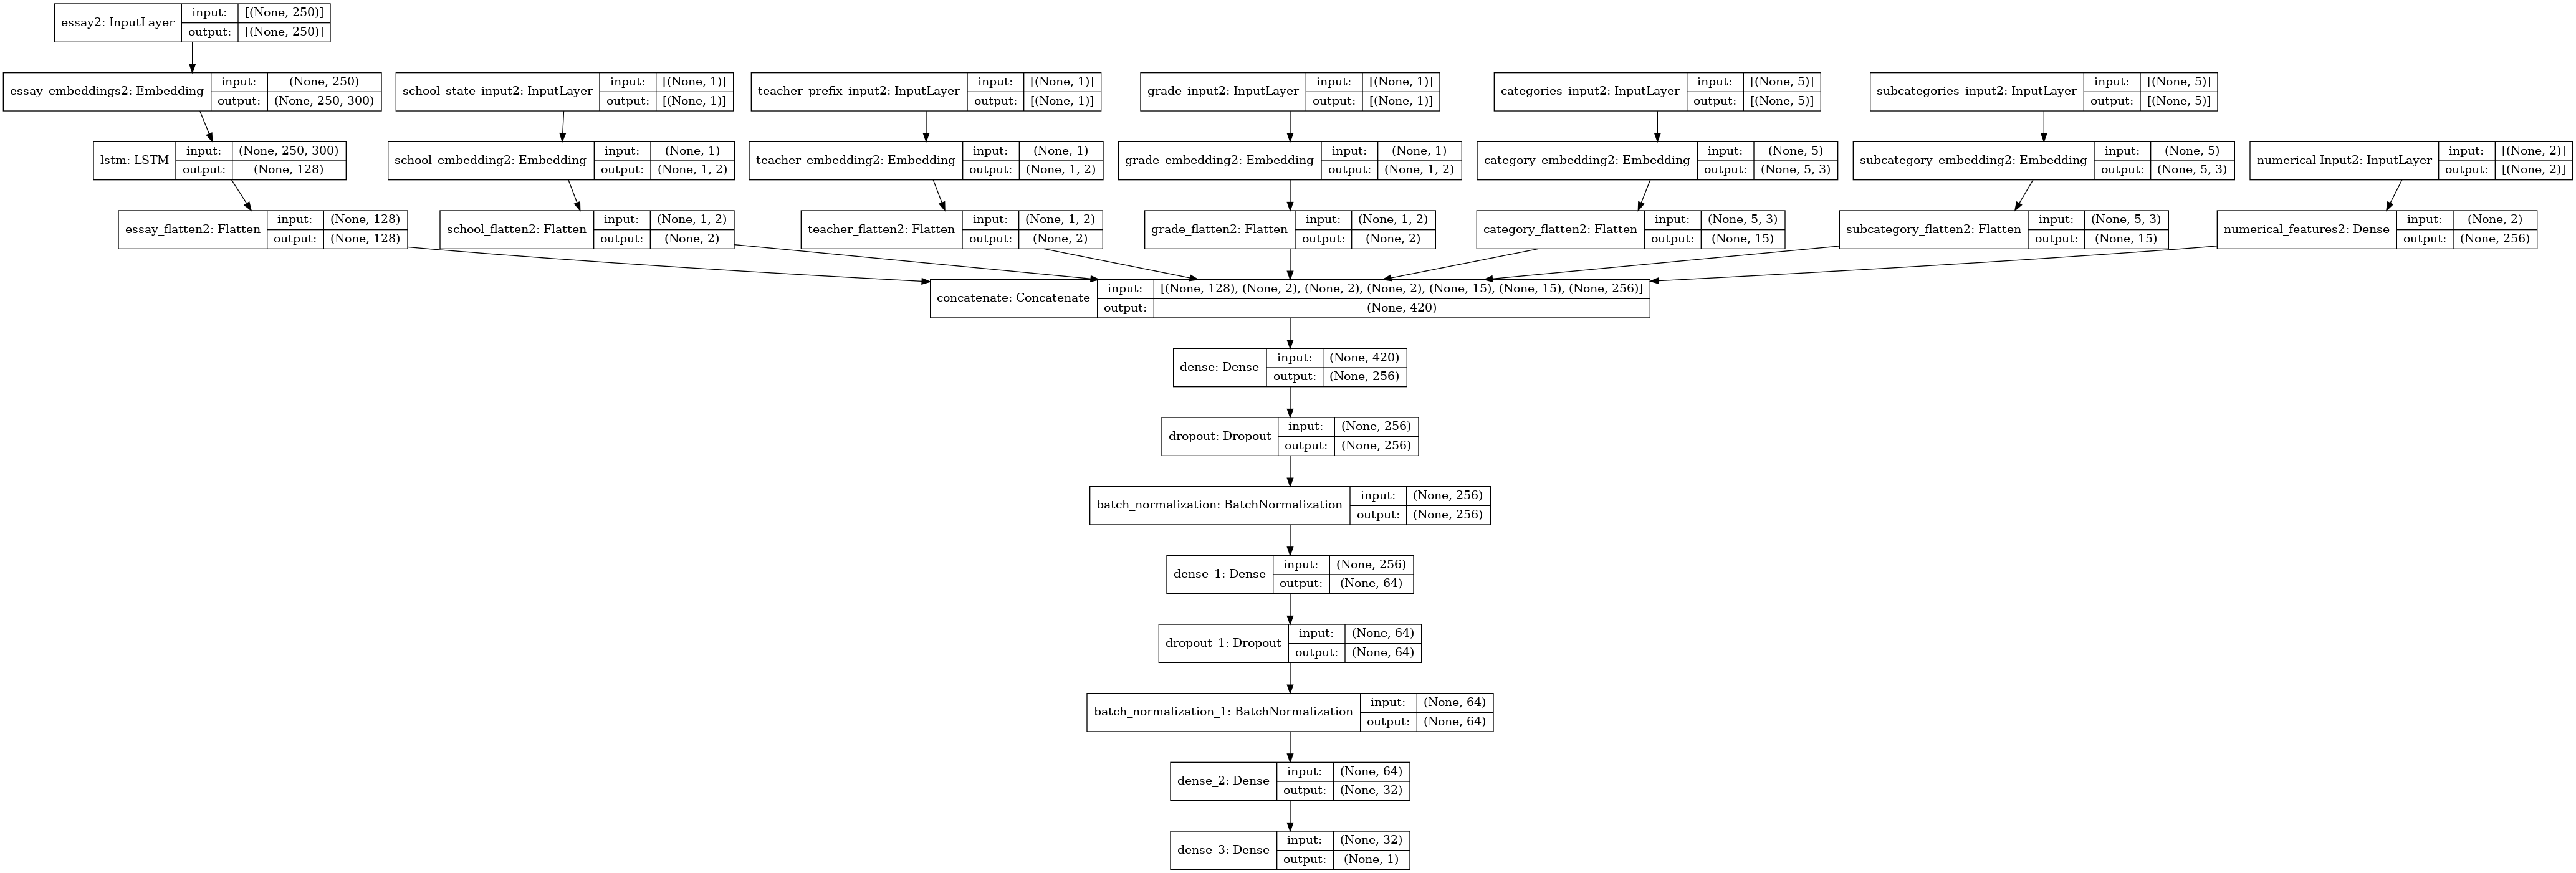

In [118]:
keras.utils.plot_model(model_2, "multi_input_and_output_model_2_2.png", show_shapes=True)


In [119]:


X_train_data2 = [
                essay_train_padded2,X_train_school_state_encoded, X_train_teacher_prefix_encoded,
                X_train_grade_encoded, x_train_category_padded, x_train_subcategory_padded,
                xtrain_numerical
                ]

X_test_data2 = [
                essay_test_padded2,X_test_school_state_encoded, X_test_teacher_prefix_encoded,
                X_test_grade_encoded, x_test_category_padded, x_test_subcategory_padded,
                xtest_numerical
                ]
    
X_cv_data2 = [essay_cv_padded2,X_cv_school_state_encoded, X_cv_teacher_prefix_encoded,
                X_cv_grade_encoded, x_cv_category_padded, x_cv_subcategory_padded,
                xcv_numerical]


## 2.6 Model Training

In [120]:

basePath = 'Model_2_save/weights'

model_checkpoint_callback = CustomModelCheckPoint(basePath,'val_loss',"Model2")
roc_callback = CustomROCTracker(X_cv_data2,y_cv)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs3")


model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)




# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

2022-06-15 02:35:54.429562: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-15 02:35:54.429612: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-15 02:35:54.693234: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-15 02:35:54.693423: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [121]:
model_2.fit(
        x = X_train_data2,
        y = y_train,
        epochs=20,
        validation_data = (X_cv_data2, y_cv),
        callbacks= [ 
                roc_callback,
#                 early_stopping_callback,
                model_checkpoint_callback,
#                 tensorboard_callback
                ],
        class_weight = class_weights,
        batch_size = 256
)

Epoch 1/20
274/274 [==============================] - 13s 39ms/step - loss: 1.5389 - accuracy: 0.5151 - val_loss: 1.3917 - val_accuracy: 0.4242
Epoch :0, validation AUC : 0.5886128630524996
Epoch 2/20
274/274 [==============================] - 10s 37ms/step - loss: 1.1987 - accuracy: 0.5046 - val_loss: 1.1287 - val_accuracy: 0.3557
Epoch :1, validation AUC : 0.6107259869488669
Epoch 3/20
274/274 [==============================] - 10s 37ms/step - loss: 1.0120 - accuracy: 0.5087 - val_loss: 0.9856 - val_accuracy: 0.4037
Epoch :2, validation AUC : 0.6103586686594189
Epoch 4/20
274/274 [==============================] - 10s 38ms/step - loss: 0.8911 - accuracy: 0.5231 - val_loss: 0.8601 - val_accuracy: 0.5685
Epoch :3, validation AUC : 0.6170113270395798
Epoch 5/20
274/274 [==============================] - 10s 37ms/step - loss: 0.8154 - accuracy: 0.5290 - val_loss: 0.8463 - val_accuracy: 0.3136
Epoch :4, validation AUC : 0.6162373913259857
Epoch 6/20
274/274 [==============================

In [147]:
# #Best Model
# best_model2= keras.models.load_model('./Model2_val_accuracy:0.8203661441802979-epoch:18.hdf5')

print('Auc roc Score of Test data is for Model 2 ===> ',roc_auc_score(y_test,model_2.predict(X_test_data2)))



Auc roc Score of Test data is for Model 2 ===>  0.738553430513712


# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [123]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, test_size=0.20, random_state=42, stratify=label_df)


X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)

print("Training Data shape", X_train.shape)
print("Testing Data Shape", X_test.shape)
print("Cross Validation shape",X_cv.shape)

Training Data shape (69918, 8)
Testing Data Shape (21850, 8)
Cross Validation shape (17480, 8)


## 3.1 Model Text Vectorizer

In [124]:
# Tokenize our training data
tokenizer = Tokenizer( oov_token=oov_token)
tokenizer.fit_on_texts(X_train['essay'])

# # Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
essay_train_sequences = tokenizer.texts_to_sequences(X_train['essay'])
essay_test_sequences = tokenizer.texts_to_sequences(X_test['essay'])
essay_cv_sequences = tokenizer.texts_to_sequences(X_cv['essay'])
# Get max training sequence length
maxlen = min(250,max([len(x) for x in essay_train_sequences]))
print("Maximum Length of essay in training data", maxlen)

# Pad the training sequences
train_padded = pad_sequences(essay_train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
test_padded = pad_sequences(essay_test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
cv_padded = pad_sequences(essay_cv_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
# Output the results of our work
print("\nPadded training shape:", train_padded.shape)
print("\nPadded testing shape", test_padded.shape)
print("\nPadded validation shape", cv_padded.shape)
print("Training sequences data type:", type(essay_train_sequences))
print("Padded Training sequences data type:", type(train_padded))


Maximum Length of essay in training data 250

Padded training shape: (69918, 250)

Padded testing shape (21850, 250)

Padded validation shape (17480, 250)
Training sequences data type: <class 'list'>
Padded Training sequences data type: <class 'numpy.ndarray'>


In [125]:
glove_model = dict()

with open('../input/glove42b300dtxt/glove.42B.300d.txt','r',encoding="utf8") as glove_file:
    for line in tqdm(glove_file):
        splitline = line.split()
        word = splitline[0]
        word_vector = np.array([float(val) for val in splitline[1:]],dtype=np.float16)
        glove_model[word] = word_vector
print(len(glove_model))

1917494it [04:05, 7824.57it/s]

1917494


In [126]:
EMBEDDING_DIMENSION = 300
print('Found %s unique tokens.' % len(word_index))
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIMENSION), dtype=np.float16)
for word, index in word_index.items():
    # get word embedding we created using glove vectors
    w2v = glove_model.get(word)
    # if word embedding is none this word is not present in our vectors ignore them
    if w2v is not None:
        embedding_matrix[index] = w2v
        
print("embedding_matrix shape",embedding_matrix.shape)

Found 47380 unique tokens.
embedding_matrix shape (47381, 300)


In [127]:
# cleaning up
del glove_model
import gc 
gc.collect()

10176

# 3.2 Categorical Feature Transformation

## 3.2.1 School_state Encoding


In [128]:
school_state_ohe = OneHotEncoder()
X_train_school_state_ohe = school_state_ohe.fit_transform(X_train['school_state'].values.reshape(-1,1)).toarray()
X_test_school_state_encoded = school_state_ohe.transform(X_test['school_state'].values.reshape(-1,1)).toarray()
X_cv_school_state_encoded = school_state_ohe.transform(X_cv['school_state'].values.reshape(-1,1)).toarray()
print(X_cv_school_state_encoded.shape)

(17480, 51)


## 3.2.2 Teacher Prefix Encoding

In [129]:
teacher_prefix_ohe = OneHotEncoder()
X_train_teacher_prefix_encoded = teacher_prefix_ohe.fit_transform(X_train['teacher_prefix'].values.reshape(-1,1)).toarray()


X_test_teacher_prefix_encoded = teacher_prefix_ohe.transform(X_test['teacher_prefix'].values.reshape(-1,1)).toarray()
X_cv_teacher_prefix_encoded = teacher_prefix_ohe.transform(X_cv['teacher_prefix'].values.reshape(-1,1)).toarray()

## 3.2.3 Project Grade Encoding

In [130]:
grade_ohe = OneHotEncoder()
grade_ohe.fit(X_train['project_grade_category'].values.reshape(-1,1))

X_train_grade_encoded = grade_ohe.transform(X_train['project_grade_category'].values.reshape(-1,1)).toarray()
X_test_grade_encoded = grade_ohe.transform(X_test['project_grade_category'].values.reshape(-1,1)).toarray()
X_cv_grade_encoded = grade_ohe.transform(X_cv['project_grade_category'].values.reshape(-1,1)).toarray()


## 3.2.4 Clean Category Encoding

In [131]:
X_train_categories = X_train['clean_categories'].apply(lambda x: x.split())
X_test_categories = X_test['clean_categories'].apply(lambda x: x.split())
X_cv_categories = X_cv['clean_categories'].apply(lambda x: x.split())

from sklearn.preprocessing import MultiLabelBinarizer

category_ohe = MultiLabelBinarizer()

x_train_categories = category_ohe.fit_transform(X_train_categories)
x_test_categories = category_ohe.fit_transform(X_test_categories)
x_cv_categories = category_ohe.fit_transform(X_cv_categories)


## 3.2.5 Clean Subcategories Encoding

In [132]:
X_train_subcategories = X_train['clean_subcategories'].apply(lambda x: x.split())
X_test_subcategories = X_test['clean_subcategories'].apply(lambda x: x.split())
X_cv_subcategories = X_cv['clean_subcategories'].apply(lambda x: x.split())

from sklearn.preprocessing import MultiLabelBinarizer

subcategory_ohe = MultiLabelBinarizer()

x_train_subcategories = subcategory_ohe.fit_transform(X_train_subcategories)
x_test_subcategories = subcategory_ohe.fit_transform(X_test_subcategories)
x_cv_subcategories = subcategory_ohe.fit_transform(X_cv_subcategories)




## 3.3 Numerical feature Vectorization

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.array(X_train['price']).reshape(-1,1))
xtrain_price = scaler.transform(np.array(X_train['price']).reshape(-1,1))
xtest_price = scaler.transform(np.array(X_test['price']).reshape(-1,1))
xcv_price = scaler.transform(np.array(X_cv['price']).reshape(-1,1))

print("Train price shape",xtrain_price.shape)
print("Train price shape",xtest_price.shape)
print("Train price shape",xcv_price.shape)




scaler = StandardScaler()
scaler.fit(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xtrain_teacher_project = scaler.transform(np.array(X_train['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xtest_teacher_project = scaler.transform(np.array(X_test['teacher_number_of_previously_posted_projects']).reshape(-1,1))
xcv_teacher_project = scaler.transform(np.array(X_cv['teacher_number_of_previously_posted_projects']).reshape(-1,1))

print("Train teacher number of project shape",xtrain_teacher_project.shape)
print("Train teacher number of project shape",xtest_teacher_project.shape)
print("Train teacher number of project shape",xcv_teacher_project.shape)


# Concate features
xtrain_numerical = np.concatenate((xtrain_teacher_project,xtrain_price), axis=1)
xtest_numerical = np.concatenate((xtest_teacher_project,xtest_price), axis=1)
xcv_numerical = np.concatenate((xcv_teacher_project,xcv_price), axis=1)

print("xtrain numerical feature shape",xtrain_numerical.shape)

print("xtest numerical feature shape",xtest_numerical.shape)

print("xcv numerical feature shape",xcv_numerical.shape)

Train price shape (69918, 1)
Train price shape (21850, 1)
Train price shape (17480, 1)
Train teacher number of project shape (69918, 1)
Train teacher number of project shape (21850, 1)
Train teacher number of project shape (17480, 1)
xtrain numerical feature shape (69918, 2)
xtest numerical feature shape (21850, 2)
xcv numerical feature shape (17480, 2)


In [134]:
from scipy.sparse import hstack

X_train_numerical_combined = np.hstack((
    X_train_school_state_ohe,
    X_train_teacher_prefix_encoded,
    X_train_grade_encoded,
    x_train_categories,
    x_train_subcategories,
    xtrain_price,
    xtrain_teacher_project

))



X_test_numerical_combined = np.hstack((
    X_test_school_state_encoded,
    X_test_teacher_prefix_encoded,
    X_test_grade_encoded,
    x_test_categories,
    x_test_subcategories,
    xtest_price,
    xtest_teacher_project

))


X_cv_numerical_combined = np.hstack((
    X_cv_school_state_encoded,
    X_cv_teacher_prefix_encoded,
    X_cv_grade_encoded,
    x_cv_categories,
    x_cv_subcategories,
    xcv_price,
    xcv_teacher_project

))

## 3.4 Model Input Preparation

### 3.4.1 Essay Input preparation

In [135]:

essay_input = keras.Input(
    shape=(250,), name="essay"
)


essay_embedding_layer = Embedding(len(word_index)+1,
        300,
        weights=[embedding_matrix],
        input_length=maxlen,
        trainable=False,name='essay_embeddings')

essay_features = essay_embedding_layer(essay_input)
print("essay_input",essay_input.shape)
print("essay_features",essay_features.shape)
essay_drop = Dropout(0.3)(essay_features)
# add lstm
essay_lstm= keras.layers.LSTM(128)(essay_drop)
essay_flatten = Flatten(name='essay_flatten')(essay_lstm) 
print("essay features", essay_flatten.shape)


essay_input (None, 250)
essay_features (None, 250, 300)
essay features (None, 128)


## 3.4.2 Numerical Inputs

In [136]:
from warnings import filters
numerical_inputs = keras.Input(shape=(101,1 ) ,name="combined_numerical")


conv1 = keras.layers.Conv1D(filters=256, kernel_size=4,strides=2,activation='relu', kernel_initializer=he_normal(seed=1002), kernel_regularizer=l2(0.001))(numerical_inputs)

conv2 = keras.layers.Conv1D(filters=112, kernel_size=4,strides=2,activation='relu', kernel_initializer=he_normal(seed=10022), kernel_regularizer=l2(0.001))(conv1)

flatten_numerical = Flatten(name="numeric_flatten")(conv2)
print(flatten_numerical.shape)




(None, 2576)


## 3.4.3 Combine all Input

In [137]:
combined_features = Concatenate()([essay_flatten, flatten_numerical])

fc_1 = Dense(units=512, activation='relu', kernel_initializer=he_normal(seed=123), kernel_regularizer=l2(0.001))(combined_features)
drop_1 = Dropout(0.5)(fc_1)
fc_2 = Dense(units=256, activation='relu', kernel_initializer=he_normal(seed=1223), kernel_regularizer=l2(0.001))(drop_1)
drop_2 = Dropout(0.5)(fc_2)

batch_norm1= BatchNormalization()(drop_2)
fc_3 = Dense(units=112, activation='relu',kernel_initializer=he_normal(seed=3), kernel_regularizer=l2(0.001))(batch_norm1)
out_layer = Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001))(fc_3)




## 3.4.4 Prepare Model For Training

In [138]:

model3= tf.keras.Model(inputs=[essay_input, numerical_inputs], outputs=[out_layer])
model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay (InputLayer)              [(None, 250)]        0                                            
__________________________________________________________________________________________________
essay_embeddings (Embedding)    (None, 250, 300)     14214300    essay[0][0]                      
__________________________________________________________________________________________________
combined_numerical (InputLayer) [(None, 101, 1)]     0                                            
__________________________________________________________________________________________________
dropout (Dropout)               (None, 250, 300)     0           essay_embeddings[0][0]           
______________________________________________________________________________________________

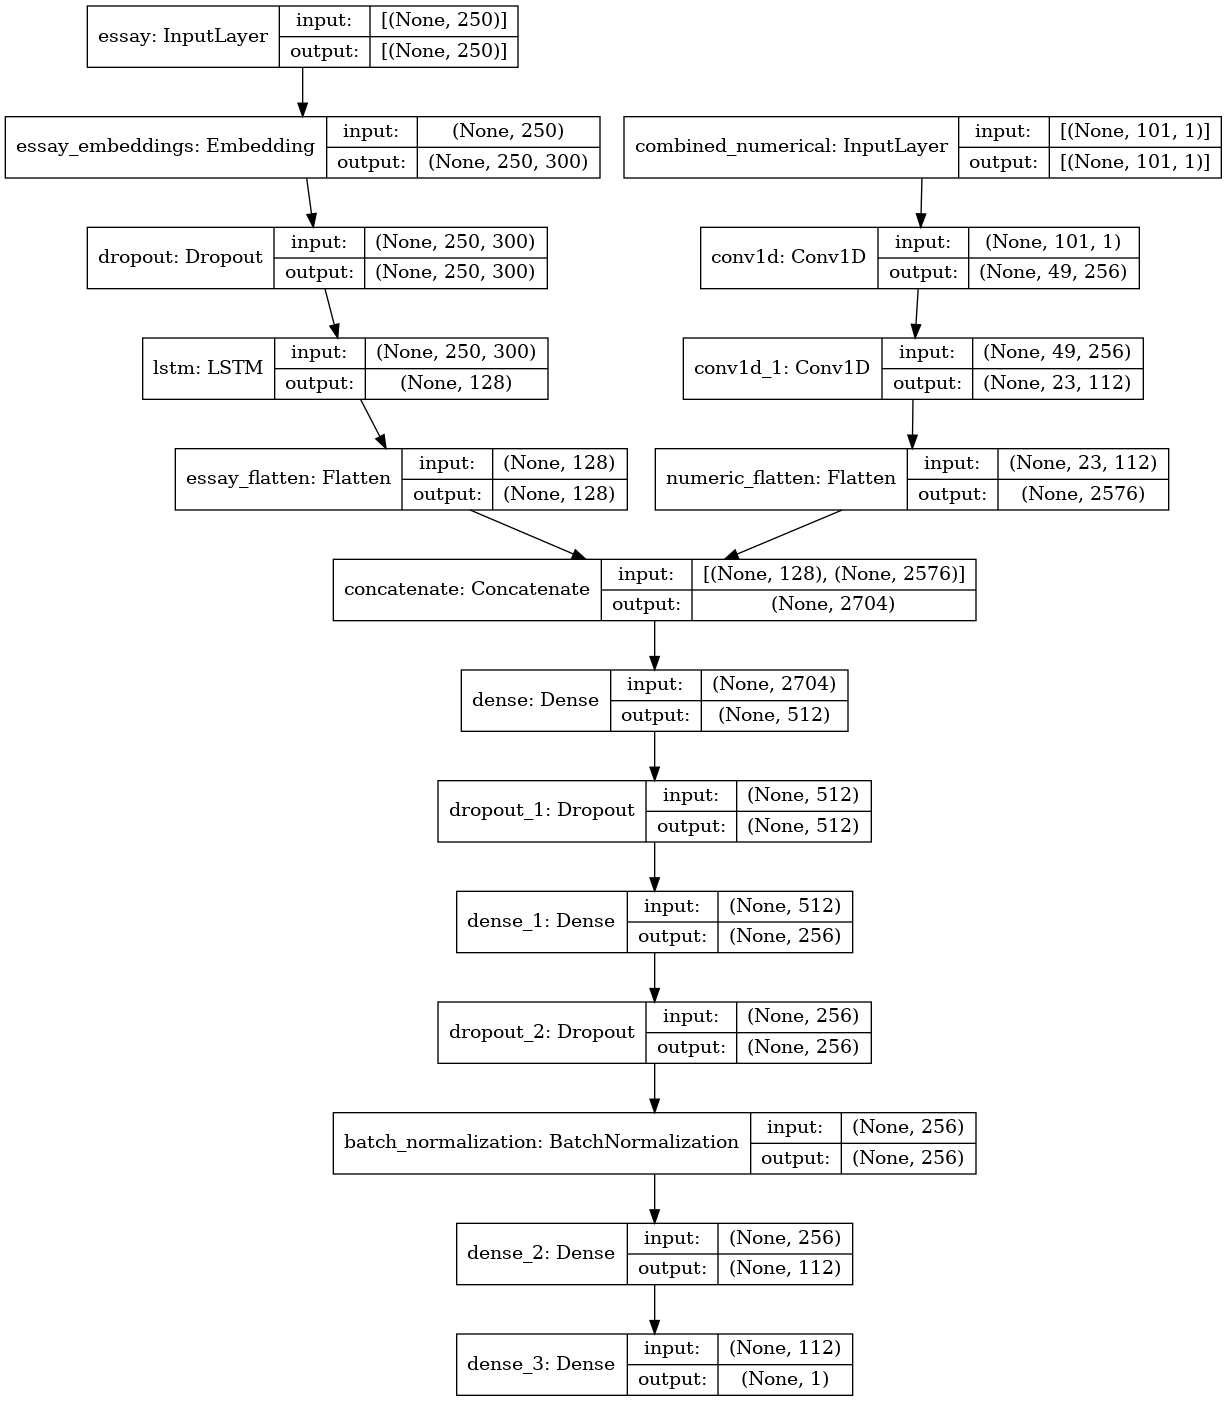

In [139]:
keras.utils.plot_model(model3, "multi_input_and_output_model3.png", show_shapes=True)


## 3.5 Model Training

In [140]:


X_train_data = [train_padded,X_train_numerical_combined]

X_test_data = [ test_padded ,X_test_numerical_combined]
    
X_cv_data = [cv_padded,X_cv_numerical_combined]


In [141]:

basePath = 'model_3_save/weights'
# Custom Callback to store model
model_checkpoint_callback = CustomModelCheckPoint(basePath,'val_loss')
roc_callback = CustomROCTracker(X_cv_data,y_cv)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5,verbose=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs_model3")


from sklearn.metrics import roc_auc_score, f1_score

2022-06-15 02:45:52.156204: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-06-15 02:45:52.156271: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-06-15 02:45:52.442251: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-06-15 02:45:52.442492: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


In [143]:
model3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [144]:
model3.fit(
        x = X_train_data,
        y = y_train,
        epochs=20,
        validation_data = (X_cv_data, y_cv),
        callbacks= [ 
                roc_callback,
#                 early_stopping_callback,
                model_checkpoint_callback,
#                 tensorboard_callback
                ],
        class_weight = class_weights,
        batch_size = 512
)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Epoch 1/20
137/137 [==============================] - 12s 70ms/step - loss: 2.4381 - accuracy: 0.5084 - val_loss: 1.7789 - val_accuracy: 0.8217
Epoch :0, validation AUC : 0.5540599584580385
Epoch 2/20
137/137 [==============================] - 9s 66ms/step - loss: 1.6017 - accuracy: 0.5069 - val_loss: 1.4385 - val_accuracy: 0.1519
Epoch :1, validation AUC : 0.5072894036925548
Epoch 3/20
137/137 [==============================] - 9s 65ms/step - loss: 1.2634 - accuracy: 0.5073 - val_loss: 1.1801 - val_accuracy: 0.1514
Epoch :2, validation AUC : 0.5345192723797048
Epoch 4/20
137/137 [==============================] - 9s 66ms/step - loss: 1.0771 - accuracy: 0.4940 - val_loss: 1.0499 - val_accuracy: 0.1514
Epoch :3, validation AUC : 0.5673739475160693
Epoch 5/20
137/137 [==============================] - 9s 66ms/step - loss: 0.9508 - accuracy: 0.5087 - val_loss: 1.0115 - val_accuracy: 0.3005
Epoch :4, validation AUC : 0.6636631311793146
Epoch 6/20
137/137 [==============================] - 

In [145]:
#Best Model
# best_model3= keras.models.load_model('model1_val_accuracy:0.7462814450263977-epoch:5.hdf5')
print('Auc roc Score of Test data is for Model 1 ===> ',roc_auc_score(y_test,model3.predict(X_test_data)))

Auc roc Score of Test data is for Model 1 ===>  0.7584224047317916
